# TP1 : Tous les groupes d'ordre 4, un peu de S<sub>4</sub>

## Test d'une loi

### Codage d'une loi sur un ensemble

#### **Question 1:** Former (à la main) la liste des éléments E et le tableau correspondant de loi t pour les groupes $(\mathbb{Z}/4\mathbb{Z}, +, 0)$ et $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$, puis faire la même chose à l’aide de SageMath.

On note $C_{4}$ le groupe $(\mathbb{Z}/4\mathbb{Z}, +, 0)$, et $C_{2}C_{2}$ le groupe $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$

In [1]:
C4 = groups.permutation.Cyclic(4)
C2 = groups.permutation.Cyclic(2)
C2C2 = cartesian_product([C2, C2])

On peut trouver les éléments de l'ensemble de $C_{4}$ est:

In [2]:
C4.cayley_table().column_keys()

((), (1,2,3,4), (1,3)(2,4), (1,4,3,2))

l'application du groupe $C_{4}$: 

In [3]:
C4.cayley_table()

*  a b c d
 +--------
a| a b c d
b| b c d a
c| c d a b
d| d a b c


les éléments de $C_{2}C_{2}$

In [4]:
C2C2.cayley_table().column_keys()

(((), ()), ((), (1,2)), ((1,2), ()), ((1,2), (1,2)))

l'application du $C_{2}C_{2}$

In [5]:
C2C2.cayley_table()

*  a b c d
 +--------
a| a b c d
b| b a d c
c| c d a b
d| d c b a


### Elément neutre

$$\forall x \in G \;\; x + 0 = x \wedge 0 + x = x$$

#### **Question 2:** Ecrire une procédure SageMath qui teste si une loi donnée par un tableau t admet un élément neutre, et qui, s’il existe, le renvoie. Tester sur les tables d’opération des groupes $(\mathbb{Z}/4\mathbb{Z}, +, 0)$ et $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$, et sur une autre table choisie au hasard. Faire le même test directement à l’aide de méthode SageMath.

In [6]:
def ElementNeutre(tableau):
    tailleEnsemble = len(tableau)
    for irow in range(tailleEnsemble):
        for icol in range(tailleEnsemble):
            if tableau[irow][icol] == icol and tableau[icol][irow] == icol:
                if icol == tailleEnsemble - 1:
                    return True
                continue
            else:
                break
    return False

Cette fonction `ElementNeutre` accepte un attribut qui est un list $n \times n$ d'application du groupe. Si ce groupe a un élément neutre, il renvoye `True`. Sinon, `False`.

In [7]:
ElementNeutre(C4.cayley_table().table())

True

In [8]:
ElementNeutre(C2C2.cayley_table().table())

True

### Elément symétrique

$$\forall x,y \in G \;\; x + y = y + x$$

#### **Question 3:** Ecrire une procédure SageMath qui, pour chaque élément, recherche son élément symétrique, et qui, s’il existe, le renvoie. Tester sur les tables d’opération des groupes $(\mathbb{Z}/4\mathbb{Z}, +, 0)$ et $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$, et former la table des symétriques. Faire la même chose directement à l’aide de méthode SageMath.

In [9]:
def ElementSymetrique(tableau):
    tailleEnsemble = len(tableau)
    for irow in range(tailleEnsemble):
        for icol in range(irow, tailleEnsemble):
            if tableau[irow][icol] == tableau[icol][irow]:
                continue
            else:
                return False
    return True

Cette fonction **ElementNeutre** accepte un attribut qui est un list $n \times n$ d'application du groupe. Si cette application est symétrique, il renvoye True. Sinon, False.

In [10]:
ElementSymetrique(C4.cayley_table().table())

True

In [11]:
ElementSymetrique(C2C2.cayley_table().table())

True

### Associativité

$$\forall x,y,z \in G \;\; x + (y + z) = (x + y) + z$$

#### **Question 4**: Ecrire une procédure SageMath qui teste si une loi donnée par un tableau t est associative. Tester sur les tables d’opération des groupes $(\mathbb{Z}/4\mathbb{Z}, +, 0)$ et $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$. Faire la même chose directement à l’aide de méthode SageMath.

In [12]:
def Associativite(tableau):
    tailleEnsemble = len(tableau)
    for i in range(tailleEnsemble):
        for j in range(tailleEnsemble):
            for k in range(tailleEnsemble):
                if tableau[tableau[i][j]][k] == tableau[i][tableau[j][k]]:
                    continue
                else:
                    return False
    return True

In [13]:
Associativite(C4.cayley_table().table())

True

In [14]:
Associativite(C2C2.cayley_table().table())

True

## Test d'un morphisme

#### **Question 5:** 

1. Ecrire une procédure SageMath qui teste si une application donnée entre deux groupes est un morphisme.

$$f(x*y)=f(x)*'f(y)$$

In [15]:
C4.cayley_table().table()

[[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]

In [16]:
def EstMorphisme(matrixPerm, groupe1, groupe2):
    ord1 = -1
    ord2 = -2
    try:
        ord1 = len(groupe1.cayley_table().column_keys())
        
    except:
        ord1 = len(list(groupe1))
        
    try:
        ord2 = len(groupe2.cayley_table().column_keys())
    except:
        ord2 = len(list(groupe2))
        
    if ord1 != ord2:
        return False
    
    t1 = []
    t2 = []
    
    try:
        t1 = groupe1.cayley_table().table()
    except:
        t1 = list(groupe1)
        
    try:
        t2 = groupe2.cayley_table().table()    
    except:
        t2 = list(groupe2)
    
    for i in range(ord1):
        for j in range(ord1):
            t1ij = t1[i][j]
            ft1ij = fonctionPermutation(matrixPerm, t1ij)
            fi = fonctionPermutation(matrixPerm, i)
            fj = fonctionPermutation(matrixPerm, j)
            t2fifj = t2[fi][fj]
            if ft1ij != t2fifj:
                return False
            else:
                continue 
    return True

In [17]:
def fonctionPermutation(matrixPerm, x):
    return list(matrixPerm[x]).index(1)

fonction `EstMorphisme` accepte 3 attributs, un matrix de permutation est 2 groupes. Si cette permutation est d'un morphisme, il renvoie `True`. Sinon, `false`.

2. Utiliser cette procédure pour construire tous les automorphismes de $(\mathbb{Z}/4\mathbb{Z}, +, 0)$ puis de $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$. 

    (On rappelle qu’un automorphisme de G est une bijection de G dans lui-même qui est aussi un morphisme.)

In [18]:
def ListMatriceApplicationBijective(groupe):
    dim = len(list(groupe))
    listPermutation = Permutations(dim)
    listMatricePermutation = []
    for perm in listPermutation:
        matrix = Matrix(dim,dim,0)
        for i, p in enumerate(perm):
            matrix[i, p - 1] = 1
        listMatricePermutation.append(matrix)
    return listMatricePermutation

Fonction `ListMatriceApplicationBijective` generer toutes les bijection du groupe spécifique.

In [19]:
def GenererIsomorphisme(groupe1, groupe2):
    listIsomorphisme = []
    listMatricePermutation = ListMatriceApplicationBijective(groupe1)
    for matricePermutation in listMatricePermutation:
        if(EstMorphisme(matricePermutation, groupe1, groupe2)):
            listIsomorphisme.append(matricePermutation)
        else:
            continue
    return listIsomorphisme

Fonction `GenererIsomorphisme` trouver les isomorphisme au sein des bijections générées par `ListMatriceApplicationBijective`.

In [20]:
def GenererAutomorphisme(groupe):
    return GenererIsomorphisme(groupe,groupe)

In [21]:
GenererAutomorphisme(C4)

[
[1 0 0 0]  [1 0 0 0]
[0 1 0 0]  [0 0 0 1]
[0 0 1 0]  [0 0 1 0]
[0 0 0 1], [0 1 0 0]
]

In [22]:
GenererAutomorphisme(C2C2)

[
[1 0 0 0]  [1 0 0 0]  [1 0 0 0]  [1 0 0 0]  [1 0 0 0]  [1 0 0 0]
[0 1 0 0]  [0 1 0 0]  [0 0 1 0]  [0 0 1 0]  [0 0 0 1]  [0 0 0 1]
[0 0 1 0]  [0 0 0 1]  [0 1 0 0]  [0 0 0 1]  [0 1 0 0]  [0 0 1 0]
[0 0 0 1], [0 0 1 0], [0 0 0 1], [0 1 0 0], [0 0 1 0], [0 1 0 0]
]

3. Montrer que les groupes $(\mathbb{Z}/4\mathbb{Z}, +, 0)$ et $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$ ne sont pas isomorphes.

In [23]:
GenererIsomorphisme(C4, C2C2)

[]

Puisqu'il n'y a pas de isomorphisme trouvé, donc les groupes $(\mathbb{Z}/4\mathbb{Z}, +, 0)$ et $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$ ne sont pas isomorphes.

4. Faire la même chose directement à l’aide de méthode SageMath.

    Indications : Pour former un morphisme d’un groupe de permutation vers un autre, on peut utiliser la commande `PermutationGroupMorphis`. Pour tester si un groupe est isomorphe à un autre, utiliser la méthode is_isomorphic, qui elle aussi ne fonctionne qu’avec des groupes de permutations. $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$ s’obtient comme groupe de permutations par `groups.permutation.KleinFour()`.

In [24]:
G1 = KleinFourGroup()
G2 = PermutationGroup([(1,2,3,4)])
G1.is_isomorphic(G2)

False

## Où l'on identifie tous les groupes d'ordre 4

#### Question 6: Dire pourquoi la table de ∗ doit être un carré latin, i.e. chaque élément apparaît une fois et une seule dans chaque ligne et chaque colonne.

$*$ est d'un application associative et symetrique
$$ Dom(*) = E $$
$$ Dom(*^{-1}) = E $$
$$ Im(*) = E $$
donc $*$ est d'un carré

#### **Question 7:** 

1. Dire si ces 4 tables sont bien des tables de groupe et si ce sont les seules.

In [25]:
import numpy as np
from sage.combinat.matrices.latin import *

In [26]:
def TrouverTousGroupe(dim):
    listTableGroup = []
    listApplication = dlxcpp_find_completions(LatinSquare(dim))
    for application in listApplication:
        appli = np.reshape(application.list(),(dim,dim))
        if ElementNeutre(appli) and Associativite(appli) and ElementSymetrique(appli):
            listTableGroup.append(matrix(appli))
    return listTableGroup

In [27]:
TrouverTousGroupe(4)

[
[0 1 2 3]  [0 1 2 3]  [0 1 2 3]  [0 1 2 3]  [1 0 3 2]  [1 0 3 2]
[1 0 3 2]  [1 0 3 2]  [1 3 0 2]  [1 2 3 0]  [0 1 2 3]  [0 1 2 3]
[2 3 0 1]  [2 3 1 0]  [2 0 3 1]  [2 3 0 1]  [3 2 0 1]  [3 2 1 0]
[3 2 1 0], [3 2 0 1], [3 2 1 0], [3 0 1 2], [2 3 1 0], [2 3 0 1],

[3 0 1 2]  [2 0 3 1]  [1 3 0 2]  [2 3 0 1]  [2 3 0 1]  [3 2 0 1]
[0 1 2 3]  [0 1 2 3]  [3 2 1 0]  [3 0 1 2]  [3 2 1 0]  [2 3 1 0]
[1 2 3 0]  [3 2 1 0]  [0 1 2 3]  [0 1 2 3]  [0 1 2 3]  [0 1 2 3]
[2 3 0 1], [1 3 0 2], [2 0 3 1], [1 2 3 0], [1 0 3 2], [1 0 3 2],

[1 2 3 0]  [2 3 1 0]  [3 2 1 0]  [3 2 1 0]
[2 3 0 1]  [3 2 0 1]  [2 0 3 1]  [2 3 0 1]
[3 0 1 2]  [1 0 3 2]  [1 3 0 2]  [1 0 3 2]
[0 1 2 3], [0 1 2 3], [0 1 2 3], [0 1 2 3]
]

On a trouver tous les tables de groupe avec `TrouverApplicationGroupe(4)`. Il y a 16 tables de groupe en dimension 4.

2. Parmi ces tables, déterminer celles qui sont isomorphes à $(\mathbb{Z}/4\mathbb{Z}, +, 0)$,puis celles isomorphes à $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$.

In [28]:
groupesQ7 = TrouverTousGroupe(4)[0:4]
groupesQ7

[
[0 1 2 3]  [0 1 2 3]  [0 1 2 3]  [0 1 2 3]
[1 0 3 2]  [1 0 3 2]  [1 3 0 2]  [1 2 3 0]
[2 3 0 1]  [2 3 1 0]  [2 0 3 1]  [2 3 0 1]
[3 2 1 0], [3 2 0 1], [3 2 1 0], [3 0 1 2]
]

In [29]:
def PrintListGroupes(listGroupes):
    if len(listGroupes) == 0:
        print("non")
    else:
        for groupe in listGroupes:
            print(groupe)
            print("---------")

In [30]:
for groupe in groupesQ7:
    print("Matrice Permutation Isomorphisme de \n{} \n vers C4\n".format(groupe))
    PrintListGroupes(GenererIsomorphisme(groupe, C4))
    print()
    
    print("Matrice Permutation Isomorphisme de \n{} \n vers C2C2\n".format(groupe))
    PrintListGroupes(GenererIsomorphisme(groupe, C2C2))
    print()

Matrice Permutation Isomorphisme de 
[0 1 2 3]
[1 0 3 2]
[2 3 0 1]
[3 2 1 0] 
 vers C4

non

Matrice Permutation Isomorphisme de 
[0 1 2 3]
[1 0 3 2]
[2 3 0 1]
[3 2 1 0] 
 vers C2C2

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
---------
[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
---------
[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
---------
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
---------
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
---------
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 1 0 0]
---------

Matrice Permutation Isomorphisme de 
[0 1 2 3]
[1 0 3 2]
[2 3 1 0]
[3 2 0 1] 
 vers C4

[1 0 0 0]
[0 0 1 0]
[0 1 0 0]
[0 0 0 1]
---------
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]
[0 1 0 0]
---------

Matrice Permutation Isomorphisme de 
[0 1 2 3]
[1 0 3 2]
[2 3 1 0]
[3 2 0 1] 
 vers C2C2

non

Matrice Permutation Isomorphisme de 
[0 1 2 3]
[1 3 0 2]
[2 0 3 1]
[3 2 1 0] 
 vers C4

[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]
---------
[1 0 0 0]
[0 0 0 1]
[0 1 0 0]
[0 0 1 0]
---------

Matrice Permutation Isomorphisme de 
[0 1 2

Comme on peut constater dessus:

$(I)$ $(III)$ et $(IV)$ sont isomorphes à $(\mathbb{Z}/4\mathbb{Z}, +, 0)$

$(II)$ est isomorphe à $(\mathbb{Z}/2\mathbb{Z} × \mathbb{Z}/2\mathbb{Z}, +, 0)$


## Recherche et exploration avec SageMath de S<sub>4</sub> 

#### **Question 8: (Test du Théorème de Lagrange)**

Un théorème de Lagrange affirme que l’ordre d’un sous-groupe divise l’ordre du groupe. Tester sur quelques groupes, et en particulier sur $\mathfrak{S}_{4}$ `SymmetricGroup(4)`. En considérant $\mathfrak{A}_{4}$ `AlternatingGroup(4)`, montrer que la réciproque est fausse : il n’existe pas toujours de sous-groupe d’ordre un diviseur de l’ordre du groupe.

$\mathfrak{S}_{4}$ groupe symmétrique

In [31]:
S4 = SymmetricGroup(4)

$\mathfrak{A}_{4}$ groupe alterné

In [32]:
A4 = AlternatingGroup(4)

In [33]:
def EstDivisibleOrdreSousGroupe(groupe):
    for sousGroupe in groupe.subgroups():
        if groupe.order()%sousGroupe.order()==0:
            continue
        else:
            return False
    return True

In [34]:
EstDivisibleOrdreSousGroupe(A4)

True

In [35]:
EstDivisibleOrdreSousGroupe(S4)

True

In [36]:
def TrouverDiviseurs(nombre):
    return [ i for i in range(1,nombre+1) if nombre % i == 0]

In [37]:
def EstEqualeDiviseurEtOrdreSousGroupes(groupe):
    return list(set([ sousGroupe.order() for sousGroupe in groupe.subgroups()])) == TrouverDiviseurs(len(groupe))

In [38]:
EstEqualeDiviseurEtOrdreSousGroupes(A4)

False

In [39]:
EstEqualeDiviseurEtOrdreSousGroupes(S4)

True

$\Rightarrow$ la réciproque est fausse dans le cas $\mathfrak{S}_{4}$

#### **Question 9**: (Recherche des sous-groupes distingués)
Ecrire une procédure SageMath qui teste si un sous-groupe est distingué dans un autre. Déterminer les sous-groupes distingués de $\mathfrak{S}_{4}$, puis de $\mathfrak{A}_{4}$. Contrôler avec la méthode SageMath `is_normal()`

$$(\forall x \in G)(\forall h \in H) \; \; x * h* x^{-1} \in H$$

In [40]:
def EstAppartientA(element, groupe):
    for e in groupe:
        if e == element:
            return True
        else:
            continue
    return False

In [41]:
def EstSousGroupeDistingue(sousGroupe, groupe):
    for h in sousGroupe:
        for x in groupe:
            if EstAppartientA(x * h * x.inverse(), sousGroupe):
                continue
            else:
                return False
    return True

In [42]:
def RechercherSousGroupesDistingues(groupe):
    for generateur in groupe.subgroups():
        sousGroupe = groupe.subgroup(generateur.list())
        estdistingue = EstSousGroupeDistingue(sousGroupe.list(), groupe.list())
        print("sous groupe généré par {} est distingué: {}, est normale(par methode is_normal): {}".format(generateur.list(), estdistingue, sousGroupe.is_normal(groupe)))

In [43]:
RechercherSousGroupesDistingues(A4)

sous groupe généré par [()] est distingué: True, est normale(par methode is_normal): True
sous groupe généré par [(), (1,2)(3,4)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,3)(2,4)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,4)(2,3)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (2,4,3), (2,3,4)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,2,3), (1,3,2)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,4,2), (1,2,4)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,3,4), (1,4,3)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,2)(3,4), (1,3)(2,4), (1,4)(2,3)] est distingué: True, est normale(par methode is_normal): True
sous groupe généré par [(), (1,4

In [44]:
RechercherSousGroupesDistingues(S4)

sous groupe généré par [()] est distingué: True, est normale(par methode is_normal): True
sous groupe généré par [(), (1,2)(3,4)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,3)(2,4)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,4)(2,3)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (3,4)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (2,3)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (2,4)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,2)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,3)] est distingué: False, est normale(par methode is_normal): False
sous groupe généré par [(), (1,4)] est distingué: False, est normale(par methode is_normal): False
sous

#### **Question 10:** (graphe de Cayley)
Qu’appelle-t-on graphe de Cayley pour un groupe (et un système de générateurs) ? Quel rapport avec la table d’opération du groupe ? Comment SageMath représente-t-il les graphes de Cayley ?

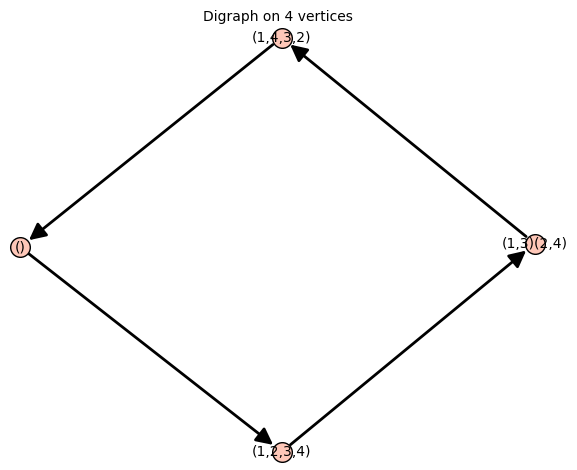

In [45]:
C4.cayley_graph()

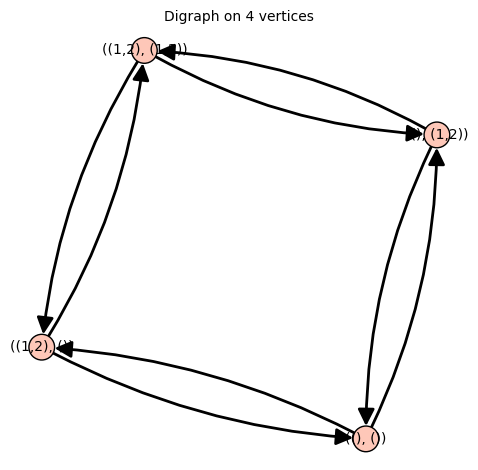

In [46]:
C2C2.cayley_graph()

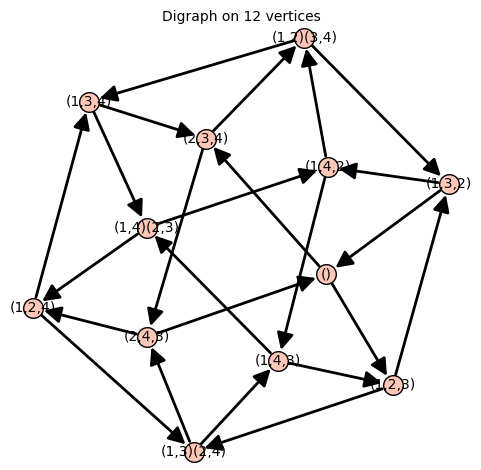

In [47]:
A4.cayley_graph()

Un graphe de Cayley est un graphe orienté et étiqueté associé à un groupe et à un système de générateurs. Plus précisément, soit G un groupe et S un ensemble de générateurs de G. Le graphe de Cayley, noté Cay(G, S), est un graphe dont les sommets correspondent aux éléments du groupe G et les arcs sont définis de la manière suivante : pour chaque élément g de G et chaque générateur s de S, on trace un arc orienté de g à gs, où gs est le produit dans le groupe G. Les arcs sont étiquetés par les générateurs s qui définissent les opérations entre les éléments du groupe.



#### **Question 11:** (graphe de Cayley pour $\mathfrak{S}_{4}$)

In [48]:
NOT = S4("(1,3)(2,4)")
CNOT = S4("(3,4)")
SWAP = S4("(2,3)")

In [49]:
S4.subgroup([NOT, CNOT]).order()

8

In [50]:
S4.subgroup([SWAP, CNOT]).order()

6

In [51]:
S4.subgroup([SWAP, NOT]).order()

8

In [52]:
S4.subgroup([NOT, CNOT, SWAP]).order()

24

In [53]:
SG = S4.subgroup([NOT, CNOT, SWAP])
SG

Subgroup generated by [(3,4), (2,3), (1,3)(2,4)] of (Symmetric group of order 4! as a permutation group)

Du coup, le sous groupe généré par [NOT, CNOT, SWAP] est le même groupe que $\mathfrak{S}_{4}$, et il y a une erreur de tracer cayley graphe de sous groupe, donc on trace $\mathfrak{S}_{4}$

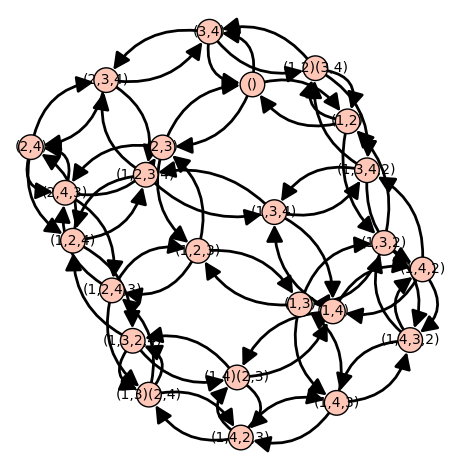

In [54]:
S4.cayley_graph().plot()

On pense qu'il n'est pas plannaire.